In [1]:
### Evaluates the trained model using a set of fresh data in data_to_verify/ ####

import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

2.2.0


In [2]:
cwd = '/home/junkai/3D_v1.1/data20200824/'
fname = os.path.join(cwd,'test_dataset.npz')

train_datasets = np.load(fname)
print(train_datasets.files)
X,T = [train_datasets[i] for i in train_datasets.files]

['x_test', 'x_temp']


In [3]:
class data_generator (keras.utils.Sequence):
    def __init__(self,path,fname_list,batch_size,):
        self.path = path
        self.fname_list = fname_list
        self.batch_size = batch_size

    
    def __len__(self):
        return (np.ceil(len(self.fname_list) / float(self.batch_size))).astype(np.int)


    def __getitem__ (self,idx):
        batch_x = self.fname_list [idx * self.batch_size : (idx+1) * self.batch_size]

        return np.array([np.load(self.path+file) for file in batch_x])

In [4]:
test_dir = os.path.join(cwd,'test/')
batch_size = 50
test_generator = data_generator(test_dir,X,batch_size)

In [5]:
fname = os.path.join(cwd,'model.h5')
model = tf.keras.models.load_model(fname)

In [6]:
ypred = model.predict(test_generator)
probability = ypred.flatten()
T.shape
probability.shape

(60500,)

In [7]:
smoothed_prob =[]
for i in range(len(probability))[::500]:
    ans=np.sum(probability[i:i+500])/500
    smoothed_prob.append(ans)

Tini = 0.0
Tlast = 6.0
T = np.linspace(Tini,Tlast,len(smoothed_prob))

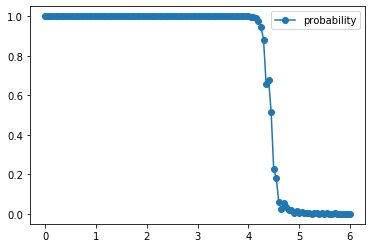

In [8]:
plt.plot(T, smoothed_prob, '-o',label='probability')
plt.legend()

In [9]:
cwd = '/home/junkai/3D_v1.1/data20200824/'
fname = os.path.join(cwd,'test_dataset.npz')

train_datasets = np.load(fname)
print(train_datasets.files)
X,T = [train_datasets[i] for i in train_datasets.files]

['x_test', 'x_temp']


In [ ]:
Tc=4.5
def make_labels(path):
    file_list = []
    for file in sorted(os.listdir(path)):
        file_list.append(file)


    labels_temp = []
    for i in file_list:
        ans = float(i.split('i')[0])
        labels_temp.append(ans)

    len(labels_temp)
    labels_temp = np.asarray(labels_temp)


    labels = np.zeros_like(labels_temp)
    for i in range(labels_temp.shape[0]):
        if labels_temp[i] < Tc:
            labels[i] = 1
        if labels_temp[i] > Tc:
            labels[i] = 0
    
    return file_list,labels_temp,labels

make_labels('/home/junkai/3D_v1.1/data20200824/test')

In [10]:
T.shape

(60500,)

In [18]:
T[0:501]

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.